# Tension in ChromoShake Centromere Simulations
This is an example notebook that demonstrates how to use tensionSim module to parse spring-tension information from chromoShake simulations.

In [5]:
import tensionSim as ts
import pandas as pd
import pickle as pkl
import seaborn as sns
import scikit_posthocs as ph

## Load all loop size simulations tension data
On my tower, I created CSV-files for all size and persistence length simulations. I appended the loop size information to the DataFrame and vertically concatenated all the databases into a single DataFrame called df_sizes. I pickled df_size into a binary file for storage.

In [6]:
with open('/home/test/Downloads/lp_df.pkl', 'rb') as f:
    df_lps = pkl.load(f)

df_lps

AttributeError: Can't get attribute 'new_block' on <module 'pandas.core.internals.blocks' from '/home/test/anaconda3/envs/chromoSnake/lib/python3.9/site-packages/pandas/core/internals/blocks.py'>

## Visualize tension using box plots

              5             50            200           500
5    1.000000e+00  9.344764e-07  4.436865e-24  4.969328e-45
50   9.344764e-07  1.000000e+00  1.823200e-07  4.471769e-20
200  4.436865e-24  1.823200e-07  1.000000e+00  7.509475e-05
500  4.969328e-45  4.471769e-20  7.509475e-05  1.000000e+00


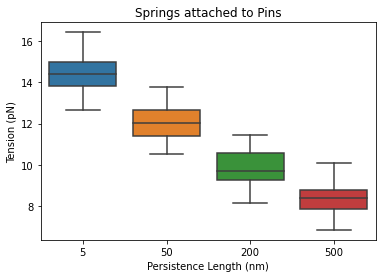

In [3]:
df_supers = df_lps.loc[(df_lps.mass_label_1.str.match('super')) | (df_lps.mass_label_2.str.match('super'))]
ax = sns.boxplot(x=df_supers.persistence_length_nm, y=df_supers.tension_pN)
ax.set_title('Springs attached to Pins')
ax.set_ylabel('Tension (pN)')
ax.set_xlabel('Persistence Length (nm)')
fig = ax.figure
fig.savefig('super_lp_tension_boxplot.png')

# stats
p_vals = ph.posthoc_dunn(df_supers, val_col='tension_pN', group_col='persistence_length_nm')
print(p_vals)

               5              50             200           500
5     1.000000e+00  2.853850e-192   0.000000e+00  0.000000e+00
50   2.853850e-192   1.000000e+00  2.206461e-240  0.000000e+00
200   0.000000e+00  2.206461e-240   1.000000e+00  2.925874e-93
500   0.000000e+00   0.000000e+00   2.925874e-93  1.000000e+00


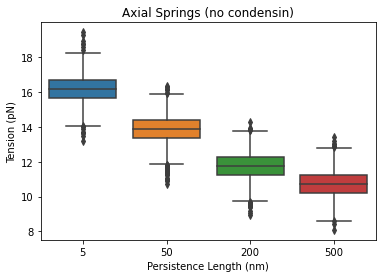

In [7]:
df_axial = df_lps.loc[
    (df_lps.mass_label_1.str.contains('chr')) &
    (df_lps.mass_label_2.str.contains('chr')) &
    (df_lps.is_condensin_spring == False) &
    (df_lps.is_in_loop_1 == False) &
    (df_lps.is_in_loop_2 == False)
]
ax = sns.boxplot(x=df_axial.persistence_length_nm, y=df_axial.tension_pN)
ax.set_title('Axial Springs (no condensin)')
ax.set_ylabel('Tension (pN)')
ax.set_xlabel('Persistence Length (nm)')
fig = ax.figure
fig.savefig('axial_lp_tension_boxplot.png')

# stats
p_vals = ph.posthoc_dunn(df_axial, val_col='tension_pN', group_col='persistence_length_nm')
print(p_vals)

               5              50             200            500
5     1.000000e+00   7.039232e-71  2.854438e-215   0.000000e+00
50    7.039232e-71   1.000000e+00   1.267555e-41  7.218164e-214
200  2.854438e-215   1.267555e-41   1.000000e+00   4.422343e-70
500   0.000000e+00  7.218164e-214   4.422343e-70   1.000000e+00


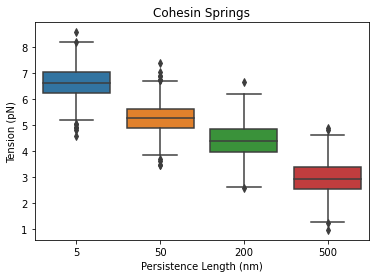

In [8]:
df_cohesin = df_lps.loc[df_lps.mass_label_1.str.contains('cohesin')]
ax = sns.boxplot(x=df_cohesin.persistence_length_nm, y=df_cohesin.tension_pN)
ax.set_title('Cohesin Springs')
ax.set_ylabel('Tension (pN)')
ax.set_xlabel('Persistence Length (nm)')
fig = ax.figure
fig.savefig('cohesin_lp_tension_boxplot.png')

# stats
p_vals = ph.posthoc_dunn(df_cohesin, val_col='tension_pN', group_col='persistence_length_nm')
print(p_vals)

              5              50             200           500
5    1.000000e+00   0.000000e+00   0.000000e+00  5.819421e-13
50   0.000000e+00   1.000000e+00  2.024618e-279  0.000000e+00
200  0.000000e+00  2.024618e-279   1.000000e+00  0.000000e+00
500  5.819421e-13   0.000000e+00   0.000000e+00  1.000000e+00


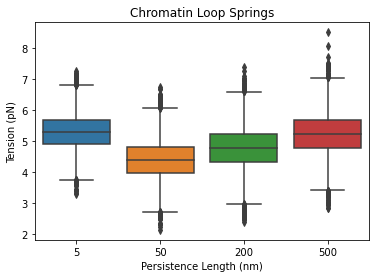

In [9]:
df_loops = df_lps.loc[(df_lps.is_in_loop_1) & (df_lps.is_in_loop_2)]
ax = sns.boxplot(x=df_loops.persistence_length_nm, y=df_loops.tension_pN)
ax.set_title('Chromatin Loop Springs')
ax.set_ylabel('Tension (pN)')
ax.set_xlabel('Persistence Length (nm)')
fig = ax.figure
fig.savefig('loops_lp_tension_boxplot.png')

# stats
p_vals = ph.posthoc_dunn(df_loops, val_col='tension_pN', group_col='persistence_length_nm')
print(p_vals)

              5             50            200           500
5    1.000000e+00  2.562850e-04  1.356651e-13  3.143494e-21
50   2.562850e-04  1.000000e+00  1.806734e-04  6.554791e-09
200  1.356651e-13  1.806734e-04  1.000000e+00  3.965359e-02
500  3.143494e-21  6.554791e-09  3.965359e-02  1.000000e+00


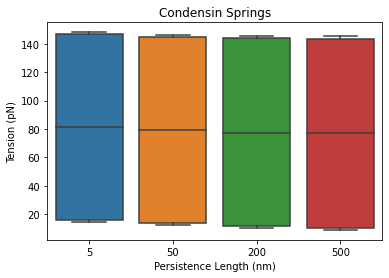

In [11]:
ax = sns.boxplot(x=df_lps.loc[df_lps.is_condensin_spring].persistence_length_nm, y=df_lps.loc[df_lps.is_condensin_spring].tension_pN)
ax.set_title('Condensin Springs')
ax.set_ylabel('Tension (pN)')
ax.set_xlabel('Persistence Length (nm)')
fig = ax.figure
fig.savefig('condensin_spring_lp_tension_boxplot.png')

# stats
p_vals = ph.posthoc_dunn(df_lps.loc[df_lps.is_condensin_spring], val_col='tension_pN', group_col='persistence_length_nm')
print(p_vals)

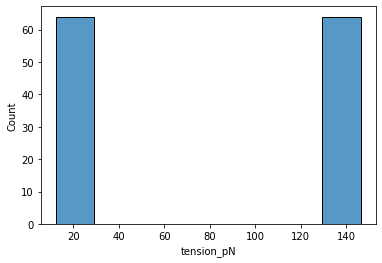

In [18]:
ax = sns.histplot(df_lps[(df_lps.is_condensin_spring) & (df_lps.persistence_length_nm == 50)].tension_pN)